In [1]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}')

In [27]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pylab as plt
import numpy as np

plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams["font.size"] = "8"

# Keras.layers API

In [5]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/5. ## /255.
x_test = x_test/5.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Dense Layer

---
```python
keras.layers.Dense(
    units,                
    activation="linear",
    use_bias=True,          
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,  
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
 unit : 양의 정수, 출력 공간의 차원.
 activation : 사용할 활성화 함수. 기본은 선형함수(f(x) = x).
 use_bias : 레이어가 바이어스 벡터를 사용하는지 여부
 kernel_initializer : 커널 가중치 매트릭스의 이니셜 라이저.
 bias_initializer : 바이어스 벡터의 이니셜 라이저.
 kernel_regularizer : 커널 가중치 행렬에 적용되는 정규화 기능.
 bias_regularizer : 바이어스 벡터에 적용되는 정규화 기능.
 activity_regularizer : 레이어의 출력에 적용되는 정규화 기능.
 kernel_constraint : 커널 가중치 행렬에 적용되는 제약 함수.
 bias_constraint : 바이어스 벡터에 적용된 제약 함수.
```
---

#### layer name 붙이기 ( 기본 모델 )

In [6]:
# 모델 정의
# 1. DataFlow(Graph)정의
input_x = layers.Input(shape=(28,28), name='input') # Keras.Input
x0 = layers.Flatten(name='flatten')(input_x)    # 784 <- (28,28)
x1 = layers.Dense(32, name='dense_32')(x0)      #  32 <- 784
x2 = layers.Activation('relu', name='relu')(x1)
x3 = layers.Dense(10, name='dense_10')(x2)      #  10 <- 32
output_x = layers.Activation('softmax', name='softmax')(x3)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 학습
history1 = model.fit(x_train, y_train, epochs=3, batch_size=1024, validation_data=(x_test,y_test))

Epoch 1/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.4084 - loss: 10.2068 - val_accuracy: 0.7549 - val_loss: 1.1845
Epoch 2/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 1.0789 - val_accuracy: 0.8069 - val_loss: 0.7474
Epoch 3/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8148 - loss: 0.7226 - val_accuracy: 0.8429 - val_loss: 0.5869


Dense layer의 파라메터들

## Activation Layers

In [8]:
## 기본 ReLU 사용
# 모델 정의 : Sequential model 사용
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(32))
#model.add(layers.Activation('relu'))   # argument 없는 경우
model.add(layers.ReLU())               # argument 없는 경우
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 모델 컨텐츠 확인
model.summary()

# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 학습
history1 = model.fit(x_train, y_train, epochs=50, batch_size=1024, validation_data=(x_test,y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3636 - loss: 8.9644 - val_accuracy: 0.6190 - val_loss: 1.2815
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6570 - loss: 1.1604 - val_accuracy: 0.7571 - val_loss: 0.8721
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.8072 - val_accuracy: 0.8120 - val_loss: 0.6817
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8253 - loss: 0.6348 - val_accuracy: 0.8461 - val_loss: 0.5689
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8596 - loss: 0.5093 - val_accuracy: 0.8715 - val_loss: 0.4810
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8810 - loss: 0.4343 - val_accuracy: 0.8890 - val_loss: 0.4149
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8971 - loss: 0.3737 - val_accuracy: 0.9010 - val_loss: 0.3714
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9093 - loss: 0.3300 - val_accuracy: 0.9059 - val_loss

In [9]:
## ReLU(arguments 사용)
input_x = layers.Input(shape=(28,28))
x0 = layers.Flatten(name='flatten')(input_x)
x1 = layers.Dense(32)(x0)
x2 = layers.ReLU(max_value=2.0, negative_slope=0.3, threshold=0.0)(x1)
x3 = layers.Dense(10)(x2)
output_x = layers.Activation('softmax')(x3)
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, epochs=50, batch_size=1024, validation_data=(x_test,y_test))

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4990 - loss: 3.0965 - val_accuracy: 0.8548 - val_loss: 0.5687
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.5142 - val_accuracy: 0.8927 - val_loss: 0.3959
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9011 - loss: 0.3564 - val_accuracy: 0.9123 - val_loss: 0.3151
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9174 - loss: 0.2907 - val_accuracy: 0.9202 - val_loss: 0.2808
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.2580 - val_accuracy: 0.9278 - val_loss: 0.2612
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9353 - loss: 0.2282 - val_accuracy: 0.9326 - val_loss: 0.2351
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9419 - loss: 0.2039 - val_accuracy: 0.9355 - val_loss: 0.2239
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9445 - loss: 0.1938 - val_accuracy: 0.9401 - val_loss

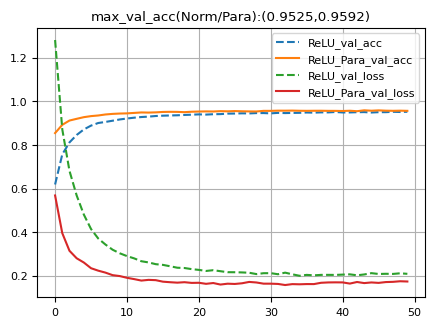

In [10]:
Norm_val_acc = max(history1.history['val_accuracy'])
Para_val_acc = max(history2.history['val_accuracy'])

plt.plot(history1.history['val_accuracy'], linestyle='--', label="ReLU_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="ReLU_Para_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="ReLU_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="ReLU_Para_val_loss")
plt.title(f'max_val_acc(Norm/Para):({Norm_val_acc:0.4f},{Para_val_acc:0.4f})')
#plt.ylim(0.1,1.1)
plt.legend()
plt.grid()
plt.show()

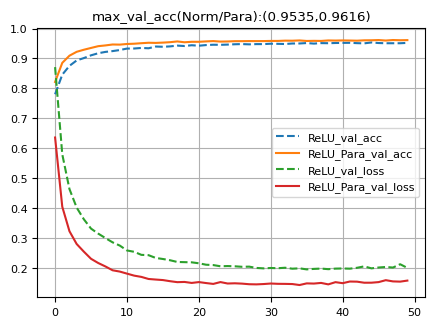

### Regularizer 적용하기

---
```python
layer = layers.Dense(
    units=32,
    kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.l2(1e-4),
    activity_regularizer=keras.regularizers.l1(1e-5)
)
```
---

In [11]:
%%time
# 모델 정의
# 1. DataFlow(Graph)정의
input_x = layers.Input(shape=(28,28), name='input')
x0 = layers.Flatten(name='flatten')(input_x)
x1 = layers.Dense(32,
                kernel_regularizer=keras.regularizers.l2(0.01),
                bias_regularizer=keras.regularizers.l2(0.001))(x0)
x2 = layers.Activation('relu', name='relu')(x1)
x3 = layers.Dense(10,
                kernel_regularizer=keras.regularizers.l2(0.01))(x2)
output_x = layers.Activation('softmax', name='softmax')(x3)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 학습
history2 = model.fit(x_train, y_train, epochs=50, batch_size=1024, validation_data=(x_test,y_test))

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4342 - loss: 10.2528 - val_accuracy: 0.7878 - val_loss: 1.8466
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 1.7080 - val_accuracy: 0.8393 - val_loss: 1.2702
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8402 - loss: 1.2036 - val_accuracy: 0.8653 - val_loss: 1.0530
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8684 - loss: 1.0050 - val_accuracy: 0.8855 - val_loss: 0.9102
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8901 - loss: 0.8656 - val_accuracy: 0.8934 - val_loss: 0.8269
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.7749 - val_accuracy: 0.9020 - val_loss: 0.7537
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.7071 - val_accuracy: 0.9097 - val_loss: 0.7010
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9184 - loss: 0.6504 - val_accuracy: 0.9142 - val_los

Epoch 50/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2047 - accuracy: 0.9557 - val_loss: 0.2212 - val_accuracy: 0.9527
Wall time: 1min 25s

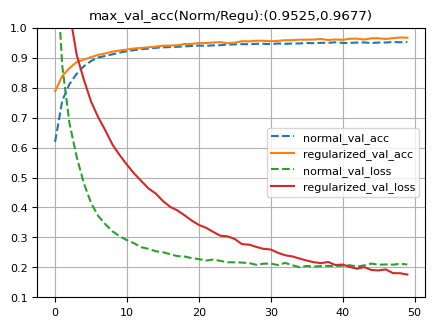

In [12]:
Norm_val_acc = max(history1.history['val_accuracy'])
Regu_val_acc = max(history2.history['val_accuracy'])

plt.plot(history1.history['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="regularized_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="regularized_val_loss")
plt.title(f'max_val_acc(Norm/Regu):({Norm_val_acc:0.4f},{Regu_val_acc:0.4f})')
plt.ylim(0.1, 1)
plt.legend()
plt.grid()
plt.show()

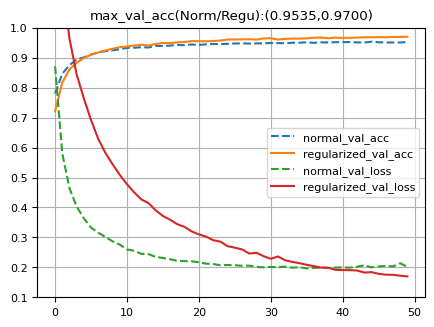

## Dropout Layer

---
```python
keras.layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)
  # rate : dropout할 비율, 실제로는 출력값에 '0'을 곱하는 비율
  # noise_shape : dropout선택용 masking 텐서
  # seed : 랜덤 seed 고정
```
---

In [13]:
%%time
# 모델 정의
# 1. DataFlow(Graph)정의
input_x = layers.Input(shape=(28,28), name='input')
x0 = layers.Flatten(name='flatten')(input_x)
x01= layers.Dropout(0.1)(x0)
x1 = layers.Dense(32)(x01)
x2 = layers.Activation('relu', name='relu')(x1)
x21= layers.Dropout(0.1)(x2)
x3 = layers.Dense(10)(x21)
output_x = layers.Activation('softmax', name='softmax')(x3)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 학습
history2 = model.fit(x_train, y_train, epochs=100, batch_size=1024, validation_data=(x_test,y_test))

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2946 - loss: 6.9690 - val_accuracy: 0.5572 - val_loss: 1.2815
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5634 - loss: 1.3600 - val_accuracy: 0.7727 - val_loss: 0.8445
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7124 - loss: 1.0172 - val_accuracy: 0.8357 - val_loss: 0.6543
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7787 - loss: 0.8102 - val_accuracy: 0.8596 - val_loss: 0.5509
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8018 - loss: 0.7074 - val_accuracy: 0.8839 - val_loss: 0.4597
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8217 - loss: 0.6306 - val_accuracy: 0.8893 - val_loss: 0.4251
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8339 - loss: 0.5759 - val_accuracy: 0.8979 - val_loss: 0.3902
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8390 - loss: 0.5373 - val_accuracy: 0.9059 - 

Epoch 100/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2815 - accuracy: 0.9176 - val_loss: 0.2381 - val_accuracy: 0.9471
Wall time: 3min 57s

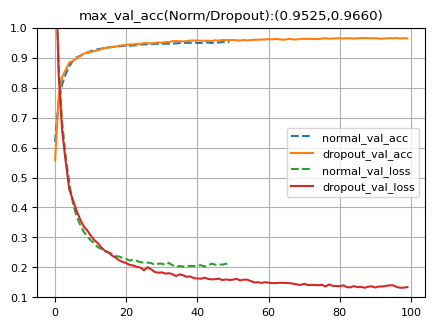

In [14]:
Norm_val_acc = max(history1.history['val_accuracy'])
Do_val_acc = max(history2.history['val_accuracy'])

plt.plot(history1.history['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="dropout_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="dropout_val_loss")
plt.title(f'max_val_acc(Norm/Dropout):({Norm_val_acc:0.4f},{Do_val_acc:0.4f})')

plt.ylim(0.1, 1)
plt.legend()
plt.grid()
plt.show()

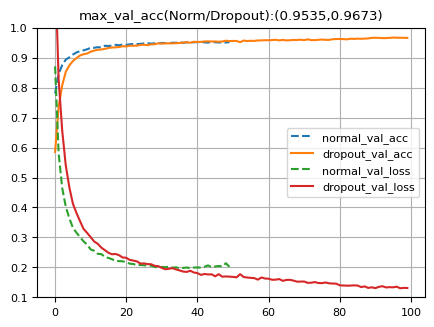

## Normalization Layers

### BatchNormalization Layer

---
```python
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",         gamma_initializer="ones",
    moving_mean_initializer="zeros",  moving_variance_initializer="ones",
    beta_regularizer=None,            gamma_regularizer=None,
    beta_constraint=None,             gamma_constraint=None,
    renorm=False,
    ...
)
axis : Normalization 할 축
momentum : 이동 평균에 대한 운동량
epsilon : 0으로 나누지 않도록 분산에 작은값 추가
center : True이면 Normalization 된 텐서에 beta 오프셋을 더함
scale : True이면을 gamma 곱하기, 다음 레이어가 선형 인 경우 비활성화 할 수 있음.
beta_initializer : 베타 가중치 초기화
gamma_initializer : 감마 가중치 초기화
moving_mean_initializer : 이동 평균 초기화
moving_variance_initializer : 이동 분산의 초기화
beta_regularizer : 베타 가중치에 대한 선택적 정규화
gamma_regularizer : 감마 가중치에 대한 선택적 정규화
beta_constraint : 베타 가중치에 대한 선택적 제약
gamma_constraint : 감마 가중치에 대한 선택적 제한
renorm : 배치 Renormalization 사용 여부 https://arxiv.org/abs/1702.03275     
  ...
```
---

In [20]:
## 기본 설정
epochs=50
batch_size=1024

## LayerNorm은 성능유지
# epochs=5
# batch_size=4

In [15]:
%%time
# 모델 정의
# 1. DataFlow(Graph)정의
input_x = layers.Input(shape=(28,28), name='input')
x0 = layers.Flatten(name='flatten')(input_x)
x1 = layers.Dense(32)(x0)
x11= layers.BatchNormalization()(x1)
x2 = layers.Activation('relu', name='relu')(x11)
x3 = layers.Dense(10)(x2)
x31= layers.BatchNormalization()(x3)
output_x = layers.Activation('softmax', name='softmax')(x31)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 학습
history2 = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,618 (100.07 KB)

 Trainable params: 25,534 (99.74 KB)

 Non-trainable params: 84 (336.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5368 - loss: 1.5606 - val_accuracy: 0.7865 - val_loss: 0.7690
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8828 - loss: 0.7070 - val_accuracy: 0.9018 - val_loss: 0.6170
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9151 - loss: 0.5734 - val_accuracy: 0.9245 - val_loss: 0.5436
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9240 - loss: 0.5010 - val_accuracy: 0.9307 - val_loss: 0.4960
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9349 - loss: 0.4437 - val_accuracy: 0.9357 - val_loss: 0.4605
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9399 - loss: 0.4039 - val_accuracy: 0.9383 - val_loss: 0.4277
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.3657 - val_accuracy: 0.9454 - val_loss: 0.3913
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9501 - loss: 0.3343 - val_accuracy: 0.9490 - val_loss

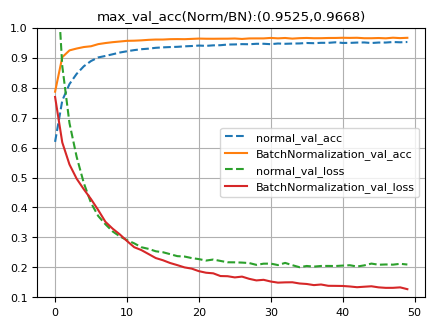

In [16]:
Norm_val_acc = max(history1.history['val_accuracy'])
BN_val_acc = max(history2.history['val_accuracy'])

plt.plot(history1.history['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="BatchNormalization_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="BatchNormalization_val_loss")
plt.title(f'max_val_acc(Norm/BN):({Norm_val_acc:0.4f},{BN_val_acc:0.4f})')

plt.ylim(0.1, 1)
plt.legend()
plt.grid()
plt.show()

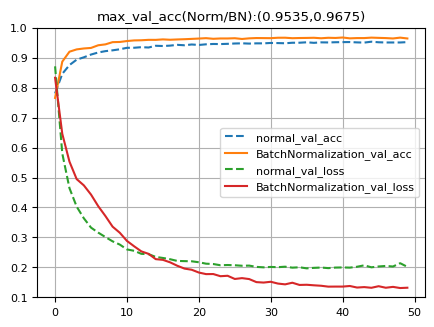

### LayerNormalization Layer

In [21]:
%%time
# 모델 정의
# 1. DataFlow(Graph)정의
input_x = layers.Input(shape=(28,28), name='input')
x0 = layers.Flatten(name='flatten')(input_x)
x1 = layers.Dense(32)(x0)
x11= layers.LayerNormalization()(x1)
x2 = layers.Activation('relu', name='relu')(x11)
x3 = layers.Dense(10)(x2)
x31= layers.LayerNormalization()(x3)
output_x = layers.Activation('softmax', name='softmax')(x31)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 학습
history3 = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 10)             │            20 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,534 (99.74 KB)

 Trainable params: 25,534 (99.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5278 - loss: 1.6404 - val_accuracy: 0.8774 - val_loss: 0.7324
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8821 - loss: 0.6911 - val_accuracy: 0.9111 - val_loss: 0.5688
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9121 - loss: 0.5475 - val_accuracy: 0.9247 - val_loss: 0.4769
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.4590 - val_accuracy: 0.9331 - val_loss: 0.4137
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9366 - loss: 0.4022 - val_accuracy: 0.9390 - val_loss: 0.3697
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9427 - loss: 0.3558 - val_accuracy: 0.9445 - val_loss: 0.3362
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9469 - loss: 0.3222 - val_accuracy: 0.9445 - val_loss: 0.3105
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9516 - loss: 0.2934 - val_accuracy: 0.9486 - val_loss

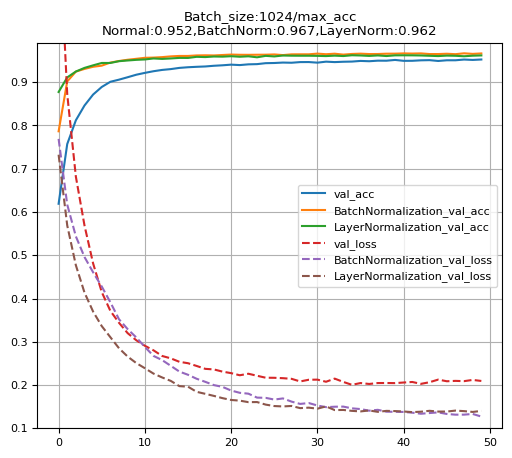

In [29]:
plt.figure(figsize=(6,5))
plt.plot(history1.history['val_accuracy'], linestyle='-', label="val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="BatchNormalization_val_acc")
plt.plot(history3.history['val_accuracy'], linestyle='-', label="LayerNormalization_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="val_loss")
plt.plot(history2.history['val_loss'], linestyle='--', label="BatchNormalization_val_loss")
plt.plot(history3.history['val_loss'], linestyle='--', label="LayerNormalization_val_loss")

h1_max = np.max(history1.history['val_accuracy'])
h2_max = np.max(history2.history['val_accuracy'])
h3_max = np.max(history3.history['val_accuracy'])

plt.title(f'Batch_size:{batch_size}/max_acc\nNormal:{h1_max:.3f},BatchNorm:{h2_max:.3f},LayerNorm:{h3_max:.3f}')
plt.ylim(0.1, 0.99)
plt.legend()
plt.grid()
plt.show()